<a href="https://colab.research.google.com/github/LIZZETHGOMEZ/Data-Sciene-BEDU-Santander-2021/blob/main/Analisis%20de%20Datos%20con%20Python/Sesion_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuciones muestrales y técnicas de evaluación de modelos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets_BEDU/Remoto diabetes-clean.csv')
df.head()

,Unnamed: 0,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df['glucose'].sample(n = 20, replace = False)

92      81
193    135
506    180
468    120
509    120
731    120
354     90
367    101
435    141
586    143
36     138
714    102
412    143
467     97
78     131
651    117
476    105
695    142
459    134
45     180
Name: glucose, dtype: int64

In [ ]:
# Queremos una fracion del 10% de la poblacion
df['glucose'].sample(frac = 0.1, replace = True)

463     88
693    129
338    152
55      73
693    129
      ... 
8      197
504     96
122    107
520     68
479    132
Name: glucose, Length: 77, dtype: int64

## Bootstrap

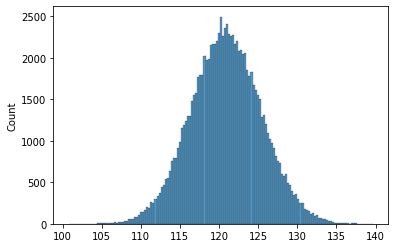

In [ ]:
#Simulación de nuevas muestras a partir de las que tenemos
medias = []

for i in range(100_000): # el guin bajo solo es de referencia, no se lee
  muestra = df['glucose'].sample(n = 50, replace = True)
  medias.append(muestra.mean())

# Graficamos nuestra simulacion
medias_serie = pd.Series(medias, bins = 50)
sns.histplot(medias_serie);

In [ ]:
# Observemos la simetría
medias_serie.skew()

0.03318122239322465

In [ ]:
#Observemos la curtosis
medias_serie.kurtosis()

0.029240598517845218

### Ejercicio

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/datasets_BEDU/Remoto us_unemployment-oct_2012.csv')
data.head()

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1


In [ ]:
print(f" Media: {data['Unemployment'].mean()}")
print(f" Mediana: {data['Unemployment'].median()}")

 Media: 7.146
 Mediana: 7.1


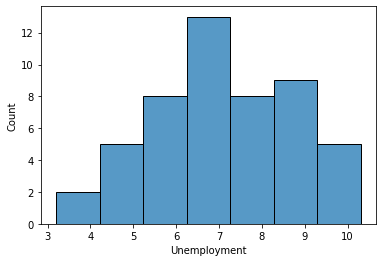

In [ ]:
sns.histplot(data['Unemployment']);

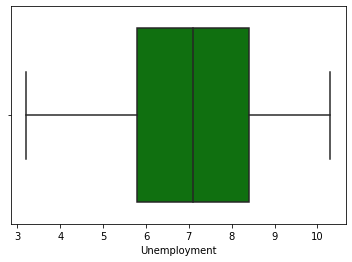

In [ ]:
sns.boxplot(x = data['Unemployment'], color = 'green');

-0.018586027301558786
0.0033330453935858095


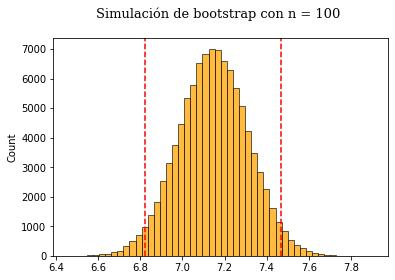

In [113]:
#Simulación de nuevas muestras a partir de las que tenemos
medias = []

for i in range(100_000): # el guin bajo solo es de referencia, no se lee
  muestra = data['Unemployment'].sample(n = 100, replace = True)
  medias.append(muestra.mean())

# Graficamos nuestra simulacion
medias_serie = pd.Series(medias)
sns.histplot(medias_serie, bins = 50, color = 'orange');
plt.title('Simulación de bootstrap con n = 100 \n', size = 13, family = 'serif' )

# Le metemos los intervalos de confianza
limite_inferior = medias_serie.quantile(0.025)
limite_superior = medias_serie.quantile(0.975)

plt.axvline(limite_inferior, color = 'red', linestyle = '--');
plt.axvline(limite_superior, color = 'red', linestyle = '--');

print(medias_serie.skew())
print(medias_serie.kurtosis())


-0.05214104492923108
-0.041741382983127906


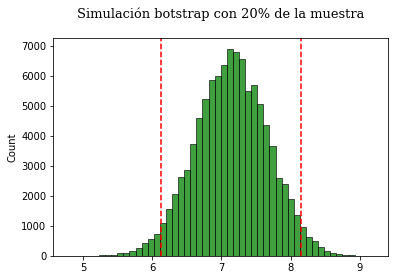

In [116]:
# Con 20%
medias = []

for i in range(100_000): # el guin bajo solo es de referencia, no se lee
  muestra = data['Unemployment'].sample(frac = 0.2, replace = True)
  medias.append(muestra.mean())

# Graficamos nuestra simulacion
medias_serie = pd.Series(medias)
sns.histplot(medias_serie, bins = 50, color = 'Green');
plt.title('Simulación botstrap con 20% de la muestra\n', size = 13, family = 'serif');

# Le metemos los intervalos de confianza
limite_inferior = medias_serie.quantile(0.025)
limite_superior = medias_serie.quantile(0.975)

plt.axvline(limite_inferior, color = 'red', linestyle = '--');
plt.axvline(limite_superior, color = 'red', linestyle = '--');

print(medias_serie.skew())
print(medias_serie.kurtosis())

-0.020071786212693364
0.0032506423894149705


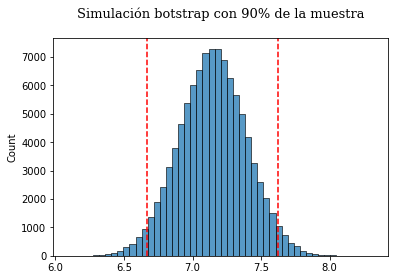

In [117]:
# Con 90% de la muestra
medias = []

for i in range(100_000): # el guin bajo solo es de referencia, no se lee
  muestra = data['Unemployment'].sample(frac = 0.9, replace = True)
  medias.append(muestra.mean())

# Graficamos nuestra simulacion
medias_serie = pd.Series(medias)
sns.histplot(medias_serie, bins = 50);
plt.title('Simulación botstrap con 90% de la muestra\n', size = 13, family = 'serif');

# Le metemos los intervalos de confianza
limite_inferior = medias_serie.quantile(0.025)
limite_superior = medias_serie.quantile(0.975)

plt.axvline(limite_inferior, color = 'red', linestyle = '--');
plt.axvline(limite_superior, color = 'red', linestyle = '--');

print(medias_serie.skew())
print(medias_serie.kurtosis())

### Regresión Lineal


In [118]:
#Usamos la base de diabetes
diabetes = pd.read_csv('/content/drive/MyDrive/datasets_BEDU/Remoto diabetes-clean.csv', index_col = 0)
diabetes.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


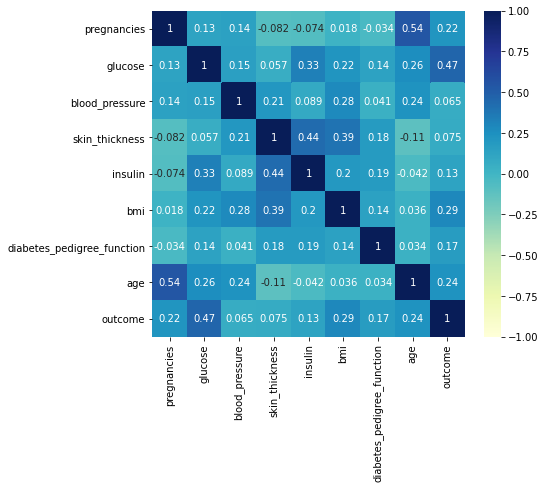

In [138]:
# Observemos la correlación de nuestras variables
plt.figure(figsize = (7,6))
sns.heatmap(diabetes.corr(), vmin = -1, vmax = 1, cmap = 'YlGnBu', annot = True);

In [139]:
# Cargamos las bibliotecas a usar para hacer la regresión 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [140]:
# Establecemos las variables independientes y la variable a estimar
X = df[['glucose', 'skin_thickness']]
y = df['insulin']

 Regresión utilizando un conjunto de datos de prueba

In [141]:
# Dividimos nuestros datos en un connjunto de entrenamiento y otro de prueba
# Lo normal es 70% entrenamiento y 30% de prueba
# Se los asignamos a nuestras variables, con shuffle indicamos que queremos que saque los datos de forma aleatoria
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [142]:
# Sacamos la regresión
lr = LinearRegression()
lr.fit(X_training, y_training) # Hacemos el ajuste con los datos de entrenamiento

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [143]:
#Sacamos el score que es el R2 utilizando nuestros datos de prueba
lr.score(X_test, y_test)

0.20277525730104062

Regresión entrenado a todos los datos, sin un conjunto de prueba

Nota: Puede cauras un overfit (sobre estimación)

Ya que podría estar ajustandose muy bien a los datos especificos que tenemos, pero si llegamos a modificarlos, quizá el modelo no funcione en otro caso. 

In [146]:
# Entrenamos el modelo sin datos de prueba
lr_2 = LinearRegression()
lr_2.fit(X, y)
lr_2.score(X,y)

0.28491868235030937

### Ejercicio

### Validación Cruzada

In [97]:
from sklearn.model_selection import cross_validate

In [98]:
lr = LinearRegression()

In [108]:
# usando crossvalidate se encarga de hacer el fit, le pasamos todos los valores y 
# la funcion se encarga de hacer la separacion de prueba y entrenamiento
# el mecanismo a utilizar para sacar el score, que por default es el R2
scores = cross_validate(lr, x, y, scoring = 'r2')

# Tambien podemos el crossvalidate con cv 
scores = cross_validate(lr, x, y, scoring = 'r2', cv = 6)

In [109]:
#Imprimimos los scores
# Nos muestra el tiempo que se tardo en correr el fit
# tiempo de calculo del score
scores

{'fit_time': array([0.00174451, 0.00170469, 0.00175357, 0.00169992, 0.00159216,
        0.00159931]),
 'score_time': array([0.00105023, 0.00101948, 0.00220871, 0.001019  , 0.00096035,
        0.0010097 ]),
 'test_score': array([0.46674452, 0.75357657, 0.76719971, 0.59642484, 0.6245579 ,
        0.38398972])}

In [110]:
#Saquemos los intervalos de confianza que creamos ajustan mejor
print(scores['test_score'].mean())
print(f"{scores['test_score'].mean():.3f} +/- {scores['test_score'].std():.3f}")

0.5987488763420297
0.599 +/- 0.139
